# Econ 441B Week 5 Assignment
# Richard Grigorian (UID: 505-088-797)

In [111]:
import pandas as pd
# from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import zipfile
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


## 1. Import US perm Visas csv from CCLE using zip extractor.

In [78]:
zf = zipfile.ZipFile("us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

C:\Users\Richard PC\AppData\Local\Temp\ipykernel_16208\3709042431.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zf.open('us_perm_visas.csv'))


## 2. Choose 3 or 4 features you think are important. `Case_status` is your target variable.


In [3]:
for i in df.columns:
    print(i)

add_these_pw_job_title_9089
agent_city
agent_firm_name
agent_state
application_type
case_no
case_number
case_received_date
case_status
class_of_admission
country_of_citizenship
country_of_citzenship
decision_date
employer_address_1
employer_address_2
employer_city
employer_country
employer_decl_info_title
employer_name
employer_num_employees
employer_phone
employer_phone_ext
employer_postal_code
employer_state
employer_yr_estab
foreign_worker_info_alt_edu_experience
foreign_worker_info_birth_country
foreign_worker_info_city
foreign_worker_info_education
foreign_worker_info_education_other
foreign_worker_info_inst
foreign_worker_info_major
foreign_worker_info_postal_code
foreign_worker_info_rel_occup_exp
foreign_worker_info_req_experience
foreign_worker_info_state
foreign_worker_info_training_comp
foreign_worker_ownership_interest
foreign_worker_yr_rel_edu_completed
fw_info_alt_edu_experience
fw_info_birth_country
fw_info_education_other
fw_info_postal_code
fw_info_rel_occup_exp
fw_info

In [79]:
cols_to_delete = df.columns[df.isnull().sum()/len(df) > .90]
df.drop(cols_to_delete, axis = 1, inplace = True)

In [80]:
# Selected Data
df_select = df[["case_status", "application_type", "pw_amount_9089", "wage_offer_from_9089"]]

In [81]:
df_select.head()

,case_status,application_type,pw_amount_9089,wage_offer_from_9089
0,Certified,PERM,75629.0,75629.0
1,Denied,PERM,37024.0,37024.0
2,Certified,PERM,47923.0,47923.0
3,Certified,PERM,10.97,10.97
4,Certified,PERM,94890.0,100000.0


## 3. Clean your data for a decision tree.

In [82]:
# Getting dummies & separating variables
AT = pd.get_dummies(df_select['application_type'])
nums = df_select[["pw_amount_9089", "wage_offer_from_9089"]]
X = pd.concat([nums, AT], axis=1)
y = df_select["case_status"]

In [83]:
# Function for checking if column contains string
def check_column_type(col):
    for i in col:
        if isinstance(i, str):
            return True
    return False

result = X.apply(lambda X: check_column_type(X))
print(result)

pw_amount_9089           True
wage_offer_from_9089     True
MAILEDIN                False
ONLINE                  False
PERM                    False
dtype: bool


In [84]:
# Converting string columns to floats
X['pw_amount_9089'] = X['pw_amount_9089'].str.replace(',', '').astype(float)

In [85]:
X['wage_offer_from_9089'] = pd.to_numeric(X['wage_offer_from_9089'].str.replace(',', ''), errors='coerce')

In [86]:
# Checking if conversions worked
result = X.apply(lambda X: check_column_type(X))
print(result)

pw_amount_9089          False
wage_offer_from_9089    False
MAILEDIN                False
ONLINE                  False
PERM                    False
dtype: bool


In [95]:
# Checking how many nulls
print(X.isnull().sum())

pw_amount_9089          258112
wage_offer_from_9089    258183
MAILEDIN                     0
ONLINE                       0
PERM                         0
dtype: int64


In [100]:
# Imputing nulls with mean
X['pw_amount_9089'].fillna(X['pw_amount_9089'].mean(), inplace=True)
X['wage_offer_from_9089'].fillna(X['wage_offer_from_9089'].mean(), inplace=True)

In [101]:
print(X.isnull().sum())

pw_amount_9089          0
wage_offer_from_9089    0
MAILEDIN                0
ONLINE                  0
PERM                    0
dtype: int64


## 4. Fit and plot a decision tree of depth X.


In [102]:
# Classification Decision Tree Model
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

Text(0.5, 1.0, 'Decision Tree for Visa Status')

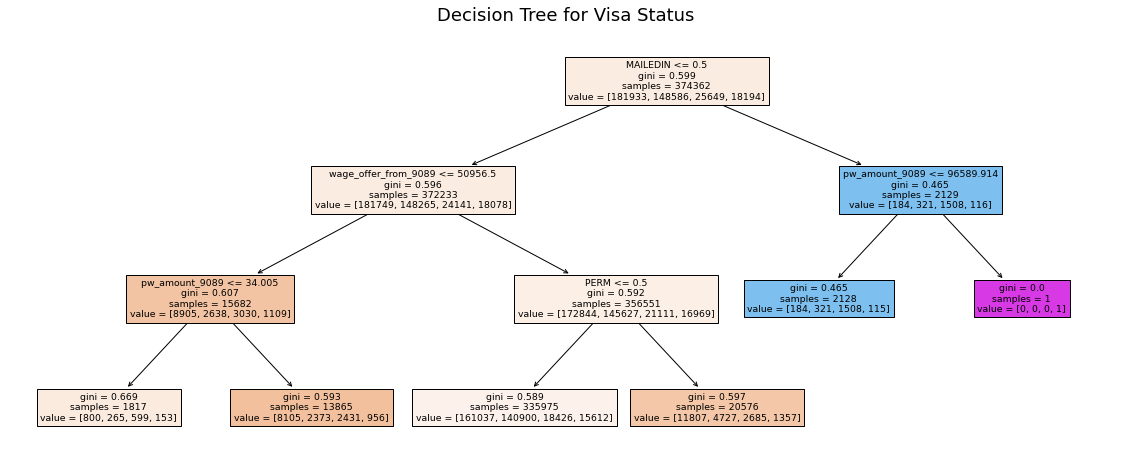

In [106]:
# Plot
plt.figure(figsize=(20,8))
tree.plot_tree(clf, feature_names = X.columns, filled=True)
plt.title('Decision Tree for Visa Status', fontsize=18)

In [110]:
# Possible Classes for y
print(y.unique())

['Certified' 'Denied' 'Certified-Expired' 'Withdrawn']


## 5. Write your interpretation of the largest (by sample size) leaf node.


From the above decision tree it is clear that the `MAILEDIN` variable (as per dummy variable separation) is the largest leaf node. It contains 374,362 samples. We see the initial separation occurs here where applications that are not mailed in go down the left branch whereas applications that are mailed in go down the right branch. In particular, it seems that the overwhelming majority of applications were **not** mailed in. We also see that many more of the mailed in applications were *certified-expired* as compared to applications that were not mailed in.

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [112]:
max_depths = [1,2,3,4,5]
outputs = []

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,)
for md in max_depths:
    clf = tree.DecisionTreeClassifier(max_depth = md)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    oos_accuracy = accuracy_score(y_test,y_pred)
    outputs.append(oos_accuracy)

In [114]:
print('Accuracy: ', outputs)

Accuracy:  [0.4887542605592418, 0.4887542605592418, 0.4887542605592418, 0.4888290540757124, 0.4926007842634441]


From the above loop results, we see that **the model with a depth of 5** had the best out-of-sample accuracy.